In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
from keras.callbacks import EarlyStopping
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
import pickle
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
import os
import cv2

In [27]:
x_train = pickle.load(open("x_train.pickle", "rb"))
y_train = pickle.load(open("y_train.pickle", "rb"))

In [28]:
x_train = x_train/255.0
x_train.shape

(11990, 64, 64, 3)

In [29]:
y_train.shape

(11990, 4)

In [30]:
# Import necessary components to build AlexNet
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam

# AlexNet for 64x64x3 Image

In [36]:
def alexnet(input_shape = (64, 64, 3), n_classes = 4):
    model = Sequential()
    
    model.add(ZeroPadding2D((1,1),input_shape = input_shape))
    
    # Step 1 - Convolution
    model.add(Conv2D(48, (5, 5), activation = 'relu'))
    
    # Step 2 - Convolution
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    
    # step 3 - Pooling
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    # Step 4 - Convolution
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(192, (2, 2), activation = 'relu'))
    
    # step 5 - Pooling
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    # Step 6 - Convolution
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(192, (2, 2), activation = 'relu'))
    
    # Step 6 - Convolution
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (2, 2), activation = 'relu'))
    
    # step 7 - Pooling
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    # Step 8 - Flattening
    model.add(Flatten())
    
    # Step 14 - Full connection
    model.add(Dense(units = 1024, activation = 'relu'))
    model.add(Dropout(rate=0.20))
    
    model.add(Dense(units = 1024, activation = 'relu'))
    
    model.add(Dropout(rate=0.20))
    
    model.add(Dense(n_classes, activation = 'softmax'))
    return model

In [37]:
AlexNet = alexnet()
Adam = Adam (lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
AlexNet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
history = AlexNet.fit(x_train, y_train, batch_size=32, epochs=8, 
                 validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 9592 samples, validate on 2398 samples
Epoch 1/8
9592/9592 [==============================] - 386s 40ms/step - loss: 0.4704 - acc: 0.8001 - val_loss: 0.0714 - val_acc: 0.9779
Epoch 2/8
9592/9592 [==============================] - 391s 41ms/step - loss: 0.0655 - acc: 0.9806 - val_loss: 0.0310 - val_acc: 0.9892
Epoch 3/8
9592/9592 [==============================] - 391s 41ms/step - loss: 0.0361 - acc: 0.9894 - val_loss: 0.0040 - val_acc: 0.9992
Epoch 4/8
9592/9592 [==============================] - 381s 40ms/step - loss: 0.0045 - acc: 0.9992 - val_loss: 0.0062 - val_acc: 0.9967
Epoch 5/8
9592/9592 [==============================] - 393s 41ms/step - loss: 0.0358 - acc: 0.9891 - val_loss: 0.0216 - val_acc: 0.9933
Epoch 6/8
9592/9592 [==============================] - 402s 42ms/step - loss: 0.0184 - acc: 0.9957 - val_loss: 0.0112 - val_acc: 0.9954
Epoch 7/8
9592/9592 [====================

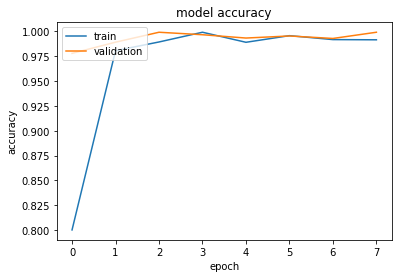

In [39]:
# Plotting Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

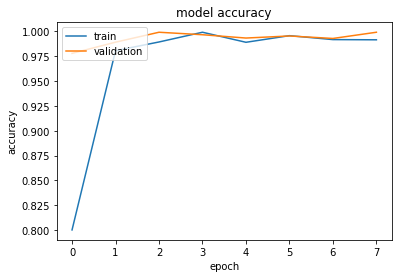

In [40]:
# Plotting Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Model Evaluation

In [41]:
DataDir_Test = "E:/asl_alphabet_test"

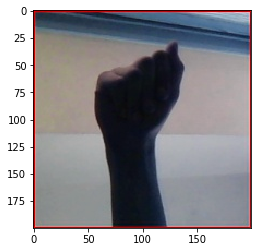

In [42]:
Categories = ["A", "B", "C", "D"]
for category in Categories:
    path = os.path.join(DataDir_Test, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

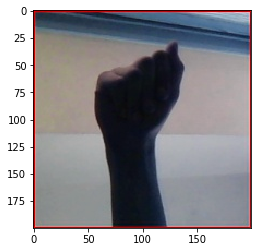

In [43]:
Categories = ["A", "B", "C", "D"]
for category in Categories:
    path = os.path.join(DataDir_Test, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

In [45]:
test_data = []
img_size = 64
def create_test_data():
    for category in Categories:
        path = os.path.join(DataDir_Test, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            test_data.append([new_array, class_num])
create_test_data()

In [46]:
x_test = []
y_test = []

for features, labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [47]:
x_test = np.asarray(x_test)
x_test = np.array(x_test).reshape(x_test.shape[0], img_size, img_size, 3)
print(x_test.shape)
y_test = np.array(y_test).reshape(-1, 1)
from keras.utils import np_utils

# One-hot encode the training labels
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)

(1173, 64, 64, 3)
(1173, 4)


In [48]:
x_test = x_test/255.0

In [50]:
preds = AlexNet.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1173/1173 [==============================] - 10s 9ms/step
Loss = 0.0019895480805064217
Test Accuracy = 0.9991474850809889
